# Capstone Project II:
## Data Wrangling

### Data Acquisition

The seelings data set can be found on the Kaggle website at https://www.kaggle.com/c/plant-seedlings-classification.    

### Data Description
There are 12 different species of plants represented by 4750 pictures of individual seedlings. The species and respective number of pictures are Black Grass (263), Charlock, Cleavers (390), Common Chickweed (287), Common Wheat (221), Fat Hen (475), Loose Silky-bent (654), Maize (221), Scentless Mayweed (516), Shepherd's Purse (?), Small-flowered Cranesbill (496), and Sugar Beet (385). 

#### Size of the training set
The total size of the training set is 1.69GB compressed. This takes up a great deal of space, and takes a long time to download directly. The pictures are not uniform in size, and each species has a different number of pictures.

### Importing the Image Files

This notebook uses PIL and matplotlib.pyplot to process and explore aspects of each image and each class. 

In [1]:
# Import the required modules
import time as time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import glob
import re

%matplotlib inline
sns.set_style("whitegrid")

In [4]:
start = time.time()
img = Image.open('\\Users\Erik\Pictures\TPhoto_00002.jpg')
new_width  = 256
new_height = 256
pic = img.resize((new_width, new_height), Image.ANTIALIAS)
end = time.time()

print('Total time:' + str(round(end - start, 3)) + 's')

Total time:0.06s


In [4]:
def pic_resizer(image_path, new_width, new_height):
    #This function takes in an image and the desired 
    #new dimensions and resizes the picture 
    img = Image.open(image_path)
    pic = img.resize((new_width, new_height), Image.ANTIALIAS)
    return pic

In [6]:
path = '..\\Data\\Common Chickweed\\01eef6041.png'
pic = pic_resizer(path, 512, 512)
pic.show()

In [5]:
pic_array = np.asarray(pic)
pic_array[0]

array([[70, 60, 57],
       [62, 54, 53],
       [60, 55, 53],
       ...,
       [48, 46, 51],
       [48, 45, 50],
       [49, 45, 49]], dtype=uint8)

In [3]:
start = time.time()
bglist = [plt.imread(pic) for pic in glob.glob('..\\Data\\Black-grass\\*.png')]
stop = time.time()

print(round(stop - start, 3), 's')

71.236 s


In [5]:
st = time.time()
bg_shaped = [pic_resizer(pic, 256, 256) for pic in glob.glob('..\\Data\\Black-grass\\*.png')]
sp = time.time()

print(round(sp - st, 1), 's')

46.7 s


In [7]:
start = time.time()
cwlist = [plt.imread(pic) for pic in glob.glob('..\\Data\\Common Chickweed\\*.png')]
stop = time.time()

print(round(stop - start, 3), 's')

38.303 s


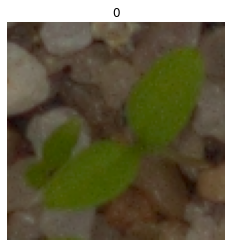

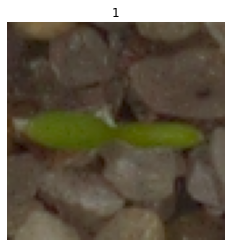

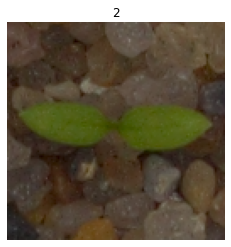

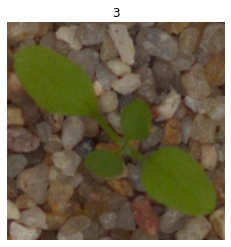

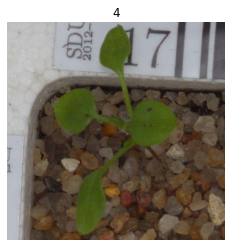

In [6]:
i = 0
while i < 5:
    _ = plt.imshow(cwlist[i])
    _ = plt.title(i)
    _ = plt.axis('off')
    _ = plt.show()
    i += 1

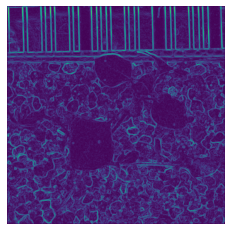

In [10]:
# Import the color module
from skimage import color

# Import the filters module and sobel function
from skimage.filters import sobel

# Make the image grayscale
image_gray = color.rgb2gray(pic_array)

# Apply edge detection filter
edge_sobel = sobel(image_gray)

# Show original and resulting image to compare
_ = plt.imshow(pic_array)
_ = plt.imshow(edge_sobel)
_ = plt.axis('off')

In [11]:
while i < 10:
    print(np.shape(cwlist[i]))
    i +=1

(91, 91, 3)
(547, 547, 3)
(132, 132, 3)
(524, 524, 3)
(499, 499, 3)


In [9]:
st = time.time()
cw_shaped = [pic_resizer(pic, 256, 256) for pic in glob.glob('..\\Data\\Common Chickweed\\*.png')]
sp = time.time()

print(round(sp - st, 1), 's')

15.8 s


In [24]:
print('Number of Common Chickweed pics:', len(cw_shaped))
print(np.shape(np.asarray(cw_shaped[7])))

Number of Common Chickweed pics: 611
(256, 256, 3)


In [11]:
start = time.time()
all_list = [plt.imread(pic) for pic in glob.glob('..\\Data\\*\\*.png')]
stop = time.time()

print(round((stop - start) / 60, 2), 'mins')

24.59 mins


In [5]:
np.shape(all_list)

(4750,)

In [13]:
labels = {0:'Black-grass', 1:'Charlock', 2:'Cleavers', 3:'Common Chickweed', 4:'Common Wheat', 5:'Fat Hen', 
          6:'Loose Silky-bent', 7:'Maize', 8:'Scentless Mayweed', 9:'Shepherds Purse', 
          10:'Small-flowered Cranesbill', 11:'Sugar Beet'}

In [7]:
print(np.shape(all_list[0]), np.shape(all_list[1]))

(196, 196, 3) (388, 388, 3)


In [14]:
st = time.time()
list2 = []
for key in labels:
    species = labels[key]
    list2.append([plt.imread(pic) for pic in glob.glob('..\\Data\\' + str(species) + '\\*.png')])
sp = time.time()

print('Total time:', round((sp - st) / 60, 2), 'mins')

Total time: 34.94 mins


In [15]:
dtype = type(list2[2][15][0][0][0])

print('Data type:', dtype, '\n Same type:', type(list2[0][0][0][0][0]) == dtype)

# Create a list of attributes
data_attributes = {'num_pics' : 0, 'largest_pic' : 0, 'smallest_pic' : 0, 'avg_pic_size': 0, 'std_dev' : 0, 
                   'data_type' : dtype}


seedlings_dict = {}

for key in labels:
    value = labels[key]
    seedlings_dict[value] = data_attributes

seedlings_data = pd.DataFrame(seedlings_dict).T

Data type: <class 'numpy.float32'> 
 Same type: True


In [16]:
pics_per_species = {}
total_num_pics = 0
for i in range(len(list2)):
    pics_per_species[i] = [labels[i], len(list2[i])]
    total_num_pics = total_num_pics + pics_per_species[i][1]

In [18]:
print(total_num_pics, pics_per_species)
print('\n', 'number of missing pics:', 4750 - total_num_pics)

4750 {0: ['Black-grass', 263], 1: ['Charlock', 390], 2: ['Cleavers', 287], 3: ['Common Chickweed', 611], 4: ['Common Wheat', 221], 5: ['Fat Hen', 475], 6: ['Loose Silky-bent', 654], 7: ['Maize', 221], 8: ['Scentless Mayweed', 516], 9: ['Shepherds Purse', 231], 10: ['Small-flowered Cranesbill', 496], 11: ['Sugar Beet', 385]}

 number of missing pics: 0


In [19]:
# Create a data frame to hold values of interest
for i in range(len(list2)):
    size_list = []
    sums = 0
    largest = 0
    smallest = 10000000
    num_pics = len(list2[i])
    if num_pics == 0:
        num_pics = 1
    seedlings_data.iloc[i, 0] = num_pics        
    for j in range(len(list2[i])):
        size = np.shape(list2[i][j])[0]
        if size == 0:
            size = 1
        size_list.append(size)
        sums = sums + size
        if size >= largest:
            largest = size
            seedlings_data.iloc[i, 1] = largest
        if size <= smallest:
            smallest = size
            seedlings_data.iloc[i, 2] = smallest
    avg_size = round(sums / num_pics)
    size_list = np.asarray(size_list)
    seedlings_data.iloc[i, 3] = avg_size
    seedlings_data.iloc[i, 4] = round(size_list.std())

In [20]:
seedlings_data

,num_pics,largest_pic,smallest_pic,avg_pic_size,std_dev,data_type
Black-grass,263,2670,73,661,498,<class 'numpy.float32'>
Charlock,390,1582,121,432,287,<class 'numpy.float32'>
Cleavers,287,866,66,310,152,<class 'numpy.float32'>
Common Chickweed,611,718,54,231,161,<class 'numpy.float32'>
Common Wheat,221,1432,51,440,303,<class 'numpy.float32'>
Fat Hen,475,1273,55,303,211,<class 'numpy.float32'>
Loose Silky-bent,654,3457,71,398,409,<class 'numpy.float32'>
Maize,221,1900,54,483,416,<class 'numpy.float32'>
Scentless Mayweed,516,1227,49,226,212,<class 'numpy.float32'>
Shepherds Purse,231,1317,63,289,248,<class 'numpy.float32'>


In [29]:
# Save the data frame for further analysis in other notebooks
seedlings_data.to_csv('seedlingsDF.csv')

## Conclusion
The data is not consistent in any way except for the datatype each matrix holds. There are differeing numbers of pictures in each group, and each group has a different range of picture sizes. These basic numbers have been loaded into a data frame and saved for further analysis in other notebooks.